In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data={
    "Area":[800, 900,1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700],
    "Bedrooms":[1,2,2,2,3,3,3,4,4,4],
    "Bathrooms":[1,1,2,2,2,2,3,3,3,3],
    "Age":[15,12,10,8,6,5,4,3,2,1],
    "Distance_City":[15,14,13,12,10,9,8,7,6,5],
    "Price":[40,50,55,60,70,75,80,90,95,100]
}
df=pd.DataFrame(data)

In [3]:
x = df.drop("Price", axis=1)
y = df["Price"]

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [5]:
Scaler = StandardScaler()
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [6]:
linear = LinearRegression()
linear.fit(x_train_scaled, y_train)

LinearRegression()

In [7]:
ridge = Ridge(alpha=0.2)
ridge.fit(x_train_scaled, y_train)

Ridge(alpha=0.2)

In [8]:
y_train_pred_lin = linear.predict(x_train_scaled)
y_test_pred_lin = linear.predict(x_test_scaled)

In [9]:
train_mse_lin = mean_squared_error(y_train, y_train_pred_lin)
test_mse_lin = mean_squared_error(y_test, y_test_pred_lin)

print("Train MSE:", train_mse_lin)
print("Test MSE:", test_mse_lin)

Train MSE: 1.262177448353619e-28
Test MSE: 2.524354896707238e-29


In [10]:
y_train_pred_rid = ridge.predict(x_train_scaled)
y_test_pred_rid= ridge.predict(x_test_scaled)

In [11]:
train_mse_rid = mean_squared_error(y_train, y_train_pred_rid)
test_mse_rid = mean_squared_error(y_test, y_test_pred_rid)

print("Train MSE:", train_mse_rid)
print("Test MSE:", test_mse_rid)

Train MSE: 0.5140004218859993
Test MSE: 0.5591595532597717


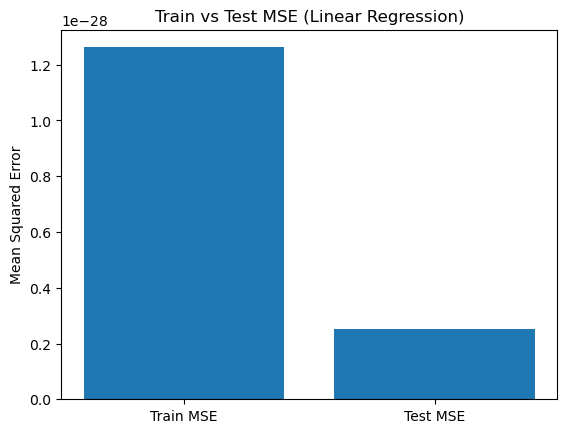

In [12]:
plt.bar(["Train MSE", "Test MSE"], [train_mse_lin, test_mse_lin])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Linear Regression)")
plt.show()

# Lasso regularization

In [13]:
lasso = Lasso(alpha=0.5)
lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.5)

In [14]:
y_train_pred = lasso.predict(x_train_scaled)
y_test_pred = lasso.predict(x_test_scaled)

In [15]:
train_mse_lasso = mean_squared_error(y_train,y_train_pred_lin)
test_mse_lasso = mean_squared_error(y_test,y_test_pred_lin)
print("Train MSE:",train_mse_lasso)
print("Test MSE:",test_mse_lasso)

Train MSE: 1.262177448353619e-28
Test MSE: 2.524354896707238e-29


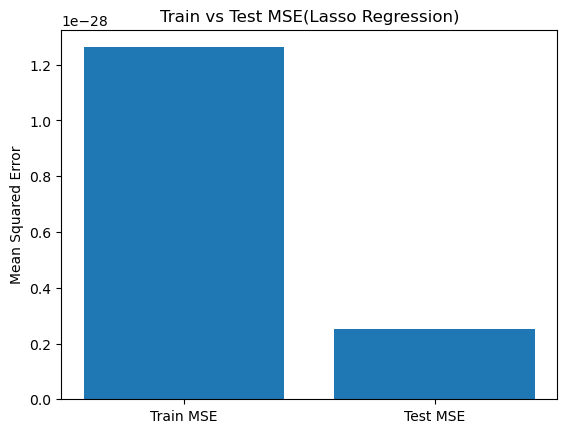

In [16]:
plt.bar(["Train MSE","Test MSE"],[train_mse_lasso,test_mse_lasso])
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE(Lasso Regression)")
plt.show()

In [17]:
lasso_coefficients=pd.Series(lasso.coef_,index=x.columns)

print(lasso_coefficients)

Area             14.002556
Bedrooms          4.727832
Bathrooms         0.000000
Age              -0.000000
Distance_City    -0.000000
dtype: float64


In [18]:
x_plot=pd.DataFrame({
    "Area":np.linspace(df["Area"].min(),df["Area"].max(),100),
    "Bedrooms":df["Bedrooms"].mean(),
    "Bathrooms":df["Bathrooms"].mean(),
    "Age":df["Age"].mean(),
    "Distance_City":df["Distance_City"].mean()
})

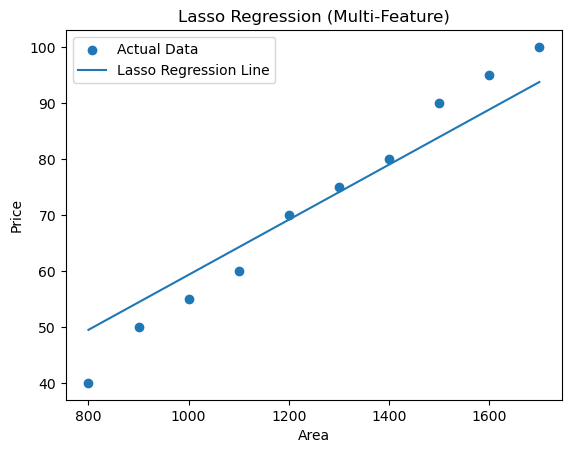

In [29]:
x_plot_scaled = Scaler.transform(x_plot) 
y_line = lasso.predict(x_plot_scaled)
plt.scatter(df["Area"], df["Price"], label="Actual Data")
plt.plot(x_plot["Area"], y_line, label="Lasso Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Lasso Regression (Multi-Feature)")
plt.legend()
plt.show()